# Autores:
### Gabriel Roberto (221020870) e Jean Soares (241033810)

In [3]:
import os
import cv2
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import splitfolders

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import VGG19

from keras.models import Sequential
from keras.layers import Conv2D , Flatten , Dense , MaxPool2D , GlobalAveragePooling2D , Dropout

from tensorflow.keras.models import Model , load_model
from tensorflow.keras import layers , models

### Descompactando o dataset

In [2]:
# Caminho para o arquivo .zip
zip_path = './fruits-360_dataset_100x100.zip'

# Diretório onde os arquivos extraídos serão salvos
extract_to = './'

# Abre o arquivo .zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extrai todos os arquivos para o diretório especificado
    zip_ref.extractall(extract_to)

print("Arquivo extraído com sucesso!")

Arquivo extraído com sucesso!


In [20]:
os.listdir("./fruits-360")

['LICENSE', 'readme.md', 'Test', 'Training']

In [6]:
os.listdir("./fruits-360/Training")

['Apple 6',
 'Apple Braeburn 1',
 'Apple Crimson Snow 1',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith 1',
 'Apple hit 1',
 'Apple Pink Lady 1',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious 1',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot 1',
 'Avocado 1',
 'Avocado ripe 1',
 'Banana 1',
 'Banana Lady Finger 1',
 'Banana Red 1',
 'Beetroot 1',
 'Blueberry 1',
 'Cabbage white 1',
 'Cactus fruit 1',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula 1',
 'Carrot 1',
 'Cauliflower 1',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier 1',
 'Cherry Wax Black 1',
 'Cherry Wax Red 1',
 'Cherry Wax Yellow 1',
 'Chestnut 1',
 'Clementine 1',
 'Cocos 1',
 'Corn 1',
 'Corn Husk 1',
 'Cucumber 1',
 'Cucumber 3',
 'Cucumber Ripe 1',
 'Cucumber Ripe 2',
 'Dates 1',
 'Eggplant 1',
 'Eggplant long 1',
 'Fig 1',
 'Ginger Root 1',
 'Granadilla 1',
 'Grape Blue 1',
 'Grape Pink 1',
 'Grape White 1',
 'Grape White 2',
 'Grape White 3',
 'Grape White

### Analisando o dataset

In [108]:
path="./fruits-360/Training/"

In [8]:
for folder in os.listdir(path):
    folder_path=os.path.join(path,folder)
    if os.path.isdir(folder_path):
        list_of_elements=os.listdir(os.path.join(path,folder))

        print(f"Pasta: {folder}")
        print(f"Quantidade de itens: {len(list_of_elements)}")
        print("*********************\n")

    else:
        print(f"{folder_path} nao eh um diretorio!")

Pasta: Apple 6
Quantidade de itens: 473
*********************

Pasta: Apple Braeburn 1
Quantidade de itens: 492
*********************

Pasta: Apple Crimson Snow 1
Quantidade de itens: 444
*********************

Pasta: Apple Golden 1
Quantidade de itens: 480
*********************

Pasta: Apple Golden 2
Quantidade de itens: 492
*********************

Pasta: Apple Golden 3
Quantidade de itens: 481
*********************

Pasta: Apple Granny Smith 1
Quantidade de itens: 492
*********************

Pasta: Apple hit 1
Quantidade de itens: 702
*********************

Pasta: Apple Pink Lady 1
Quantidade de itens: 456
*********************

Pasta: Apple Red 1
Quantidade de itens: 492
*********************

Pasta: Apple Red 2
Quantidade de itens: 492
*********************

Pasta: Apple Red 3
Quantidade de itens: 429
*********************

Pasta: Apple Red Delicious 1
Quantidade de itens: 490
*********************

Pasta: Apple Red Yellow 1
Quantidade de itens: 492
*********************

Pasta: Appl

### Plotando algumas imagens

In [9]:
melao_pele_sapo_1 = path + "Melon Piel de Sapo 1"
cereja_1 = path + "Cherry 1"
caqui_1 = path + "Kaki 1"
beringela_1 = path + "Eggplant 1"

In [84]:
def plot_imgs(item_dir,num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files=[os.path.join(item_dir,file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10,10))
    for idx,img_path in enumerate (item_files):
        plt.subplot(5,5,idx+1)
        img=plt.imread(img_path)
        plt.imshow(img)

    plt.tight_layout()

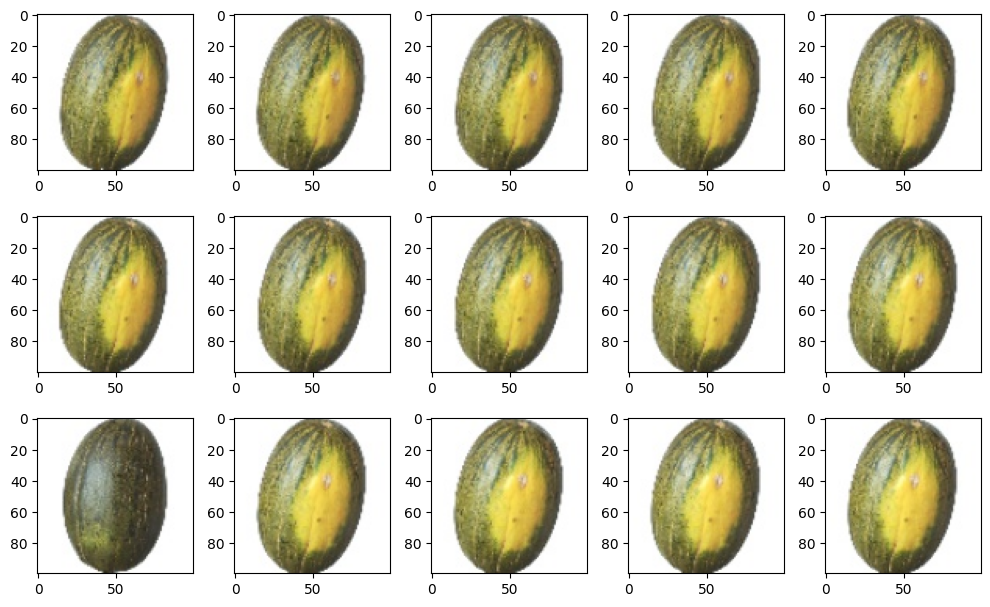

In [85]:
plot_imgs(melao_pele_sapo_1,15)

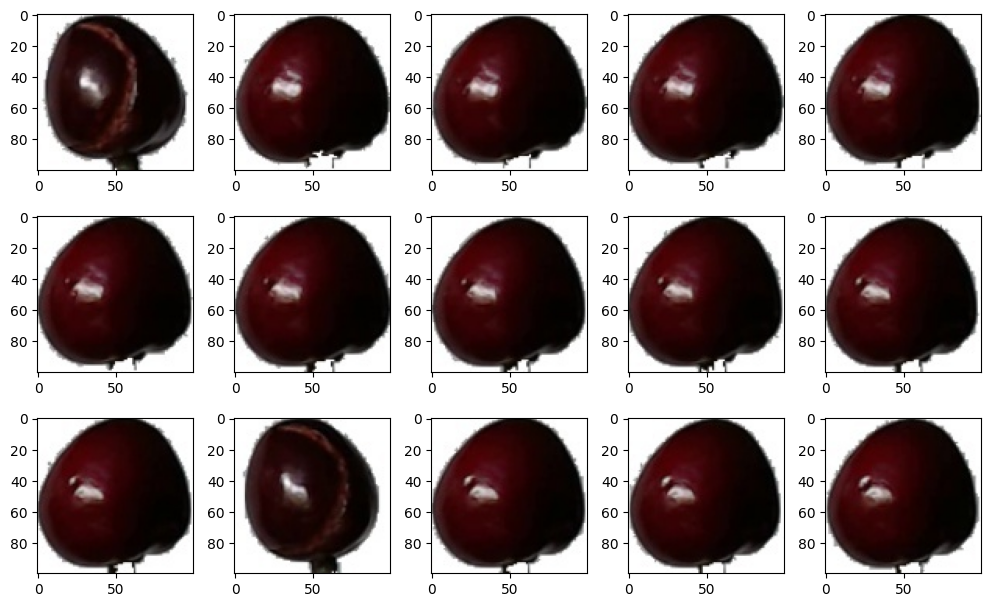

In [13]:
plot_imgs(cereja_1,15)

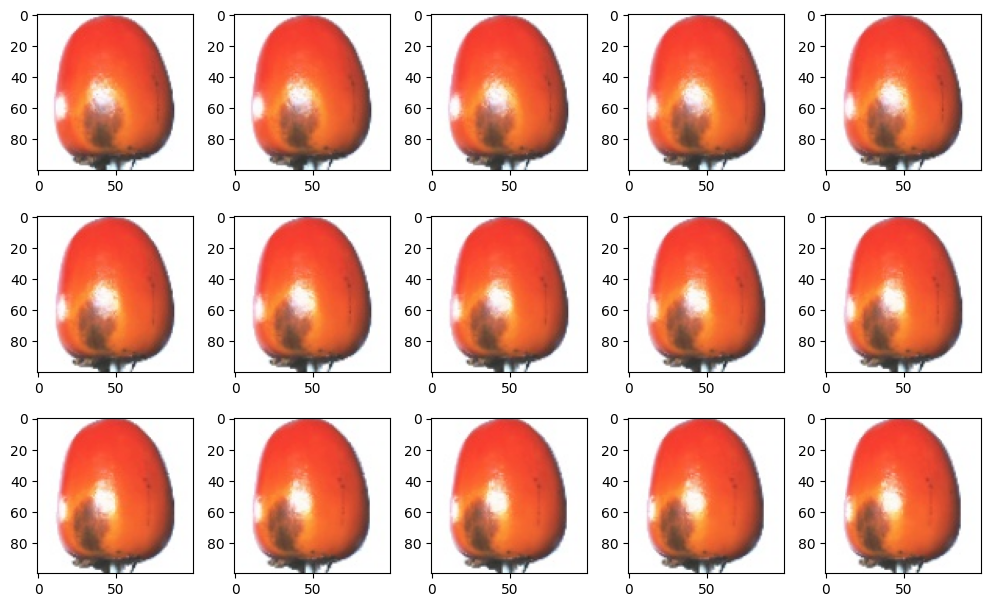

In [14]:
plot_imgs(caqui_1,15)

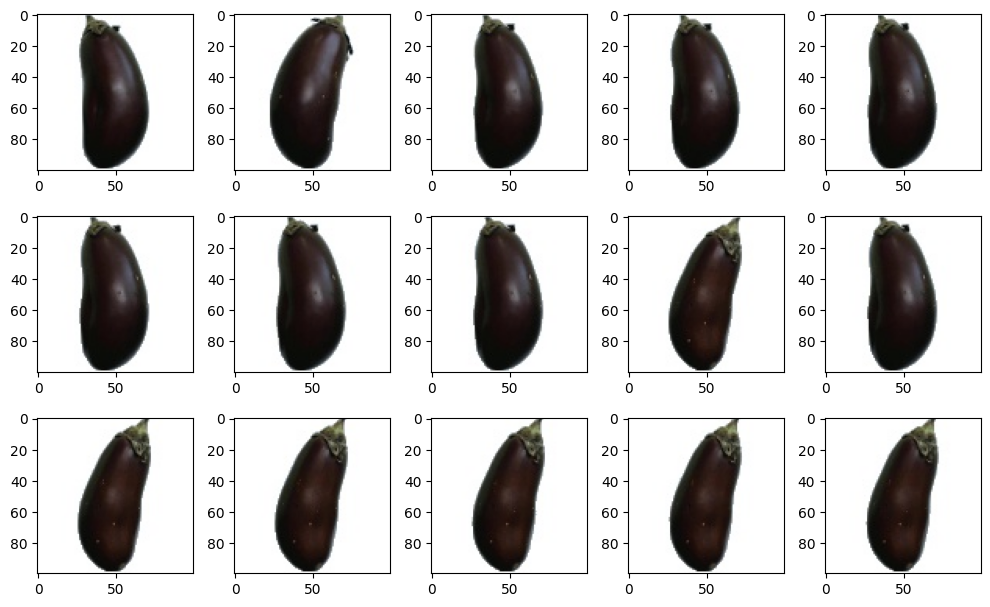

In [15]:
plot_imgs(beringela_1,15)

### Separando os dados para treinamento

In [109]:
splitfolders.ratio(path,
                  output="data",
                  seed=7,
                  ratio=(0.8,0.1,0.1))

In [121]:
train=tf.keras.preprocessing.image_dataset_from_directory("data/train",
                                       image_size=(100,100),
                                       color_mode="rgb",
                                       label_mode="categorical",
                                       batch_size=32)

test=tf.keras.preprocessing.image_dataset_from_directory("data/test",
                                     image_size=(100,100),
                                     color_mode="rgb",
                                     label_mode="categorical",
                                     batch_size=32)

valid=tf.keras.preprocessing.image_dataset_from_directory("data/val",
                                       image_size=(100,100),
                                       color_mode="rgb",
                                       label_mode="categorical",
                                       batch_size=32)

Found 56348 files belonging to 141 classes.
Found 7128 files belonging to 141 classes.
Found 7015 files belonging to 141 classes.


### Utilizando VGG19 como base do modelo

In [88]:
vgg_model=VGG19(weights="imagenet",
               include_top=False,
               input_shape=(100,100,3))

In [89]:
vgg_model.trainable = False

In [127]:
model=models.Sequential()
model.add(vgg_model)
model.add(layers.Flatten())
model.add(layers.Dense(4200,activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(141,activation="softmax"))

In [128]:
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [136]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 141), dtype=tf.float32, name=None))>

In [125]:
valid

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 141), dtype=tf.float32, name=None))>

### 1° treinamento

In [ ]:
history=model.fit(train,
                 validation_data=valid,
                 steps_per_epoch=3,
                 epochs=20)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 171s 85s/step - accuracy: 0.6836 - loss: 3.5961 - val_accuracy: 0.6104 - val_loss: 4.8424
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 146s 73s/step - accuracy: 0.7096 - loss: 3.7540 - val_accuracy: 0.6341 - val_loss: 4.3497
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 144s 72s/step - accuracy: 0.7969 - loss: 1.4434 - val_accuracy: 0.6565 - val_loss: 4.1087
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 113s 56s/step - accuracy: 0.7799 - loss: 1.6982 - val_accuracy: 0.6736 - val_loss: 3.8532
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 144s 72s/step - accuracy: 0.7383 - loss: 1.9478 - val_accuracy: 0.6860 - val_loss: 3.5962
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 115s 57s/step - accuracy: 0.7773 - loss: 1.8607 - val_accuracy: 0.6874 - val_loss: 3.5103
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 124s 62s/step - accuracy: 0.6979 - loss: 1.2984 - val_accuracy: 0.7091 - val_loss: 3.2207
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 123s 61s/step - accuracy: 0.8294 - loss: 1.1562 - val_accuracy: 0.7183 - val_loss:

In [139]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(train)

# Print the accuracy
print('Accuracy:', accuracy)

1761/1761 ━━━━━━━━━━━━━━━━━━━━ 892s 506ms/step - accuracy: 0.7588 - loss: 2.4161
Accuracy: 0.7431319952011108


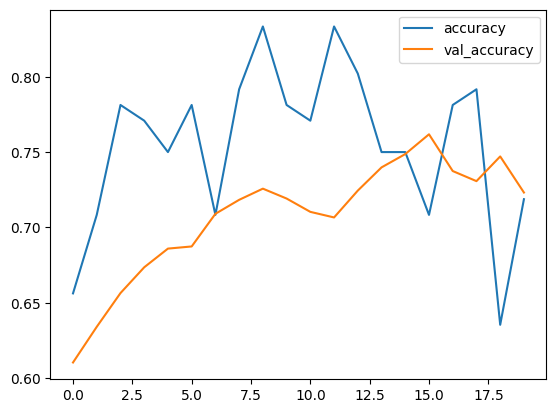

In [131]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

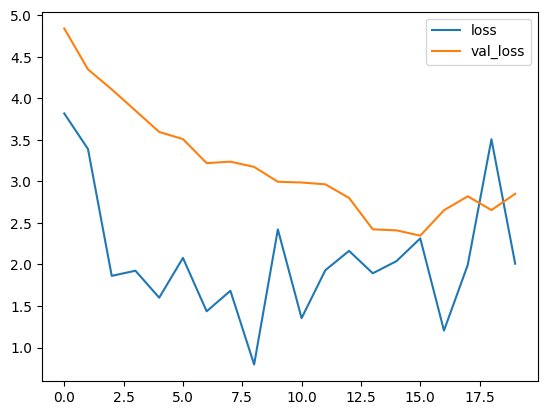

In [132]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

### 2° treinamento

In [ ]:
history=model.fit(train,
                 validation_data=valid,
                 steps_per_epoch=3,
                 epochs=10)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 146s 73s/step - accuracy: 0.5872 - loss: 15.9483 - val_accuracy: 0.3956 - val_loss: 20.0299
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 158s 78s/step - accuracy: 0.6641 - loss: 8.6395 - val_accuracy: 0.4115 - val_loss: 17.7446
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 153s 76s/step - accuracy: 0.6641 - loss: 6.2165 - val_accuracy: 0.4359 - val_loss: 16.1389
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 151s 75s/step - accuracy: 0.6302 - loss: 7.5806 - val_accuracy: 0.4480 - val_loss: 15.1440
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 151s 75s/step - accuracy: 0.5638 - loss: 9.3202 - val_accuracy: 0.4600 - val_loss: 13.2304
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 153s 76s/step - accuracy: 0.5924 - loss: 11.0724 - val_accuracy: 0.5001 - val_loss: 11.1424
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 152s 76s/step - accuracy: 0.6055 - loss: 8.5806 - val_accuracy: 0.5522 - val_loss: 9.2807
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 150s 75s/step - accuracy: 0.5742 - loss: 8.8770 - val_accuracy: 0.5421 - v

In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(train)

# Print the accuracy
print('Accuracy:', accuracy)

1761/1761 ━━━━━━━━━━━━━━━━━━━━ 1259s 715ms/step - accuracy: 0.6067 - loss: 7.1082
Accuracy: 0.5846702456474304


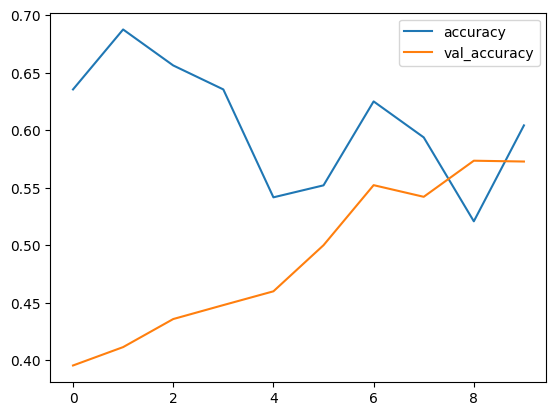

In [ ]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

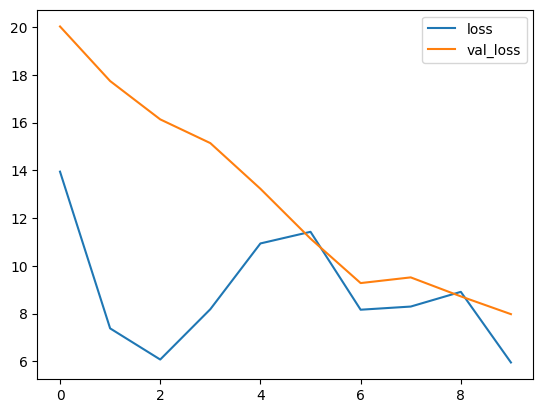

In [ ]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

In [ ]:
model.save('bad_vgg19_classifier.keras')

### Testando a predição do modelo do 2° treinamento

In [ ]:
modelo_carregado = load_model('bad_vgg19_classifier.keras')

c:\Users\JEAN\Documents\venv\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [4]:
modelo_carregado.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 3, 3, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4200)           │    19,357,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 141)            │       592,341 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,924,668 (228.59 MB)

 Trainable params: 19,950,141 (76.10 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 19,950,143 (76.10 MB)

In [6]:
# Carregar imagens e rotulagens
images = []
labels = []
label_map = {}
path = "./data/test/"

# Preencher label_map com os rótulos das frutas
for label_folder in os.listdir(path):
    label_map[label_folder] = len(label_map)
    label_folder_path = os.path.join(path, label_folder)
    for image_file in os.listdir(label_folder_path):
        image_path = os.path.join(label_folder_path, image_file)
        images.append(image_path)
        labels.append(label_map[label_folder])


In [7]:
# inverte chave-valor
label_map = {valor: chave for chave, valor in label_map.items()}
label_map

{0: 'Apple 6',
 1: 'Apple Braeburn 1',
 2: 'Apple Crimson Snow 1',
 3: 'Apple Golden 1',
 4: 'Apple Golden 2',
 5: 'Apple Golden 3',
 6: 'Apple Granny Smith 1',
 7: 'Apple hit 1',
 8: 'Apple Pink Lady 1',
 9: 'Apple Red 1',
 10: 'Apple Red 2',
 11: 'Apple Red 3',
 12: 'Apple Red Delicious 1',
 13: 'Apple Red Yellow 1',
 14: 'Apple Red Yellow 2',
 15: 'Apricot 1',
 16: 'Avocado 1',
 17: 'Avocado ripe 1',
 18: 'Banana 1',
 19: 'Banana Lady Finger 1',
 20: 'Banana Red 1',
 21: 'Beetroot 1',
 22: 'Blueberry 1',
 23: 'Cabbage white 1',
 24: 'Cactus fruit 1',
 25: 'Cantaloupe 1',
 26: 'Cantaloupe 2',
 27: 'Carambula 1',
 28: 'Carrot 1',
 29: 'Cauliflower 1',
 30: 'Cherry 1',
 31: 'Cherry 2',
 32: 'Cherry Rainier 1',
 33: 'Cherry Wax Black 1',
 34: 'Cherry Wax Red 1',
 35: 'Cherry Wax Yellow 1',
 36: 'Chestnut 1',
 37: 'Clementine 1',
 38: 'Cocos 1',
 39: 'Corn 1',
 40: 'Corn Husk 1',
 41: 'Cucumber 1',
 42: 'Cucumber 3',
 43: 'Cucumber Ripe 1',
 44: 'Cucumber Ripe 2',
 45: 'Dates 1',
 46: 'E

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


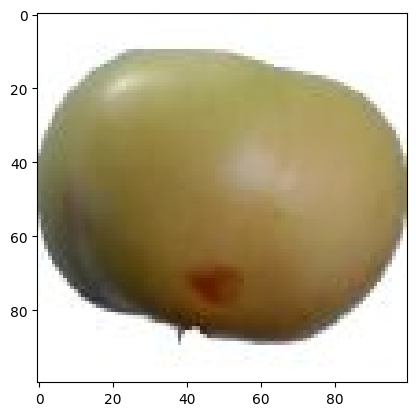

This image most likely belongs to Apple 6 with a 1.90 percent confidence.
Real: Apple 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


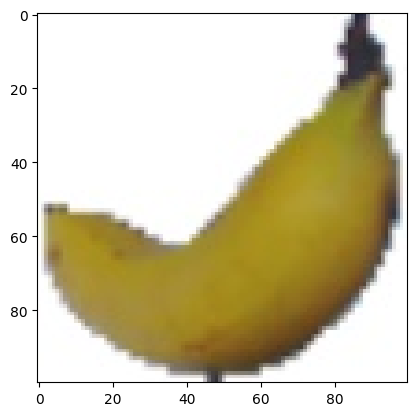

This image most likely belongs to Banana 1 with a 1.90 percent confidence.
Real: Banana 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


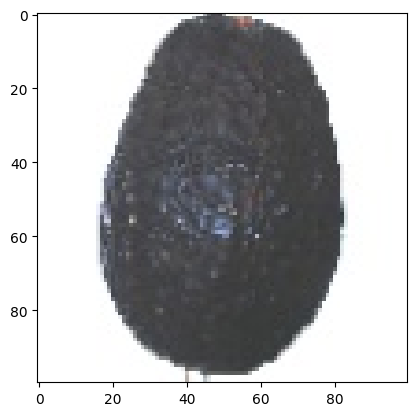

This image most likely belongs to Avocado ripe 1 with a 1.31 percent confidence.
Real: Avocado ripe 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


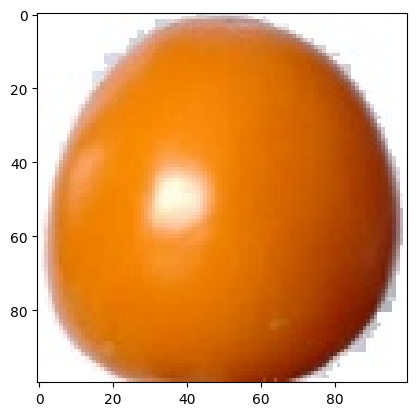

This image most likely belongs to Physalis 1 with a 1.74 percent confidence.
Real: Tomato Yellow 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


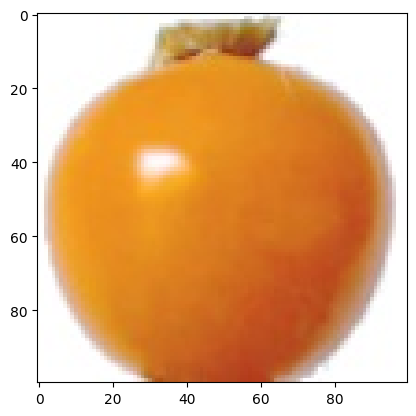

This image most likely belongs to Physalis 1 with a 1.90 percent confidence.
Real: Physalis 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


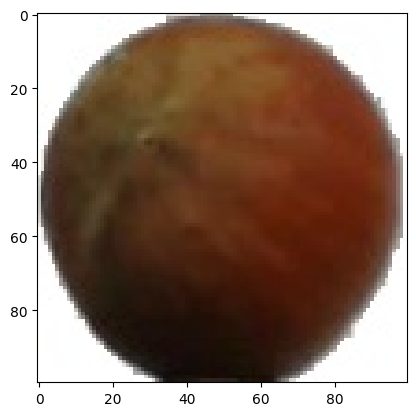

This image most likely belongs to Kiwi 1 with a 1.71 percent confidence.
Real: Nut Forest 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


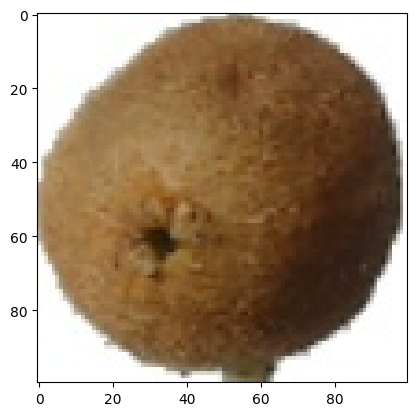

This image most likely belongs to Kiwi 1 with a 1.90 percent confidence.
Real: Kiwi 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


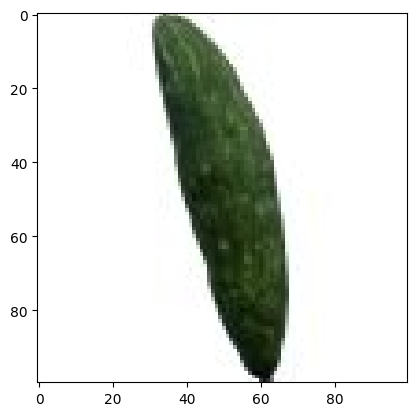

This image most likely belongs to Cucumber 3 with a 1.27 percent confidence.
Real: Cucumber 3


In [8]:
imagens = [
    "./data/test/Apple 6/r0_152_100.jpg",
    "./data/test/Banana 1/1_100.jpg",
    "./data/test/Avocado ripe 1/191_100.jpg",
    "./data/test/Tomato Yellow 1/90_100.jpg",
    "./data/test/Physalis 1/291_100.jpg",
    "./data/test/Nut Forest 1/r_200_100.jpg",
    "./data/test/Kiwi 1/r_162_100.jpg",
    "./data/test/Cucumber 3/r0_145_100.jpg"
]

real_labels = [imagem.split("/")[3] for imagem in imagens]

i = 0
for imagem in imagens:

  img = tf.keras.utils.load_img(
      imagem, target_size=(100, 100)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = modelo_carregado.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  plt.imshow(img)
  plt.show()

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(label_map[np.argmax(score)], 100 * np.max(score))
  )

  print(
      f"Real: {real_labels[i]}"
  )

  i += 1